#### Importações

In [1]:
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools

from PIL import Image
import numpy as np

#### Leitura dos dados

In [41]:
df = pd.read_csv("./data/sessao_da_tarde.csv",  index_col='Unnamed: 0')

df.head(10)

,titulo,ano,mes,dia
0,Os Smurfs 2,2022,Janeiro,3
1,Quando em Roma,2022,Janeiro,4
2,A Fabulosa Gilly Hopkins,2022,Janeiro,5
3,Mamãe Saiu de Férias,2022,Janeiro,6
4,É Fada,2022,Janeiro,7
5,Megamente,2022,Janeiro,10
6,Quero Ficar com Polly,2022,Janeiro,11
7,A Ressurreição de Gavin Stone,2022,Janeiro,12
8,O Medalhão,2022,Janeiro,13
9,Bilhete de Loteria,2022,Janeiro,14


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8438 entries, 0 to 8944
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  8429 non-null   object
 1   ano     8438 non-null   int64 
 2   mes     8438 non-null   object
 3   dia     8438 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 329.6+ KB


In [42]:
print(f"Quantidade de filmes transmitidos: {df.shape[0]}")

Quantidade de filmes transmitidos: 8438


In [43]:
print(f"Quantidade de filmes distintos transmitidos: {df['titulo'].nunique()}")

Quantidade de filmes distintos transmitidos: 3467


#### Top-10 Filmes com maior frequência de transmissão

In [44]:
df["titulo"].value_counts().head(10)

titulo
De Volta À Lagoa Azul        18
De Repente 30                18
A Família Buscapé            15
O Pestinha                   14
O Grande Desafio             14
Matilda                      14
Curtindo A Vida Adoidado     14
Táxi                         14
Click                        14
O Rapto Do Menino Dourado    13
Name: count, dtype: int64

#### Quantidade de filmes transmitidos por cada mês

In [60]:
df.groupby("mes")["titulo"].count().sort_values(ascending=False)

mes
Janeiro      751
Outubro      740
Dezembro     736
Março        732
Agosto       720
Novembro     709
Julho        708
Setembro     705
Maio         704
Abril        699
Fevereiro    619
Junho        606
Name: titulo, dtype: int64

In [92]:
df.groupby("ano")["titulo"].count().sort_values(ascending=False).head(10)

ano
2020    260
2008    259
2019    255
2021    254
2009    253
2011    251
2003    250
1989    250
2012    249
1988    248
Name: titulo, dtype: int64

In [66]:
df.groupby("mes")["titulo"].value_counts(ascending=False)["Dezembro"].head(5)

titulo
O Príncipe Do Egito             5
Apenas Amigos                   4
O Natal De Eloise               3
Olha Quem Está Falando Agora    3
Menores Desacompanhados         3
Name: count, dtype: int64

#### Filmes que foram transmitidos durante o Natal

In [73]:
df.groupby(["mes", "dia"])["titulo"].value_counts(ascending=False)["Dezembro", "25"]

titulo
Esqueceram De Mim 2: Perdido Em Nova York       2
Um Natal Muito, Muito Louco                     1
Toy Story: Um Mundo De Aventuras                1
Santa Buddies: Uma Aventura de Natal            1
PéPequeno                                       1
Os Saltimbancos Trapalhões: Rumo a Hollywood    1
O Reino Gelado                                  1
O Príncipe do Egito                             1
O Natal Mágico                                  1
O Natal Maluco De Ernest                        1
O Grinch                                        1
O Cristal Encantado                             1
Monstros VS Alienígenas                         1
Frozen: Uma Aventura Congelante                 1
FormiguinhaZ                                    1
Esqueceram de Mim                               1
Esqueceram De Mim 4                             1
Barbie em O Quebra Nozes                        1
As Gêmeas Da Sorte                              1
Apenas Amigos                              

#### Filmes que foram transmitidos no último dia do ano

In [74]:
df.groupby(["mes", "dia"])["titulo"].value_counts(ascending=False)["Dezembro", "31"]

titulo
Os Goonies                                1
Operação Zodíaco                          1
O Terno de 2 Bilhões de Dólares           1
O Pequeno Stuart Little 2                 1
O Espanta Tubarões                        1
O Cangaceiro Trapalhão                    1
Noite de Ano Novo                         1
Mom And Dad: Uma Aventura No Espaço       1
Hotel Transilvânia                        1
Como Treinar o seu Dragão                 1
Bambi 2: O Grande Príncipe Da Floresta    1
A Ilha Do Tesouro                         1
A Creche Do Papai                         1
Os Vagabundos Trapalhões                  1
Popeye                                    1
Segurança De Shopping                     1
Tainá 2: A Aventura Continua              1
Tarzan E Jane                             1
Name: count, dtype: int64

#### Filmes que foram exibidos no mesmo mês e dia

In [87]:
df[df.duplicated(subset=["titulo", "mes", "dia"], keep=False)].sort_values(by="titulo", ascending=True)

,titulo,ano,mes,dia
3392,A Filha Do Presidente,2009,Fevereiro,2
1583,A Filha Do Presidente,2016,Fevereiro,2
6850,A Joia Do Nilo,1996,Setembro,10
6613,A Joia Do Nilo,1997,Setembro,10
6735,A Mulher Do Chefe,1996,Março,25
...,...,...,...,...
5519,Um Dia Especial,2001,Abril,11
4347,Um Príncipe Em Nova York,2006,Setembro,29
6625,Um Príncipe Em Nova York,1997,Setembro,29
7762,Um Tira Da Pesada 2,1992,Maio,26


#### Quantidade de filmes que foram transmitidos no mesmo mês e dia

In [90]:
df[df.duplicated(subset=["titulo", "mes", "dia"])]["titulo"].nunique()

52

#### Text Analysis

In [96]:
import re

In [94]:
import nltk

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
def clean_text(text):
    CLEANR = re.compile('<.*?>')
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,.;]')
    
    text = str(text)
    text = text.lower()
    text = re.sub(CLEANR, ' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = re.sub('\W+', ' ', text)
    text = re.sub(r" +", ' ', text)
    
    return text.strip()

In [98]:
titulos_clean = list(map(clean_text, df['titulo']))

In [101]:
titulos_clean[:10]

['os smurfs 2',
 'quando em roma',
 'a fabulosa gilly hopkins',
 'mamãe saiu de férias',
 'é fada',
 'megamente',
 'quero ficar com polly',
 'a ressurreição de gavin stone',
 'o medalhão',
 'bilhete de loteria']

In [102]:
def stopwords_remove(text):
  stopwords = nltk.corpus.stopwords.words('portuguese')
  # tokenização
  texts_list = list(map(str.split, text))

  # remoção de stopwords
  tokens_clean = []
  for text in texts_list:
    text_clean = [token for token in text if token not in stopwords]
    tokens_clean.append(' '.join(text_clean))

  return tokens_clean 

In [103]:
titulos_sem_stopwords = stopwords_remove(titulos_clean)

In [104]:
titulos_sem_stopwords[:10]

['smurfs 2',
 'roma',
 'fabulosa gilly hopkins',
 'mamãe saiu férias',
 'fada',
 'megamente',
 'quero ficar polly',
 'ressurreição gavin stone',
 'medalhão',
 'bilhete loteria']

Matplotlib is building the font cache; this may take a moment.


In [109]:
titulos_token = list(map(str.split, titulos_sem_stopwords))

In [157]:
globo_mask = np.array(Image.open('rede-globo-logo-3.png'))

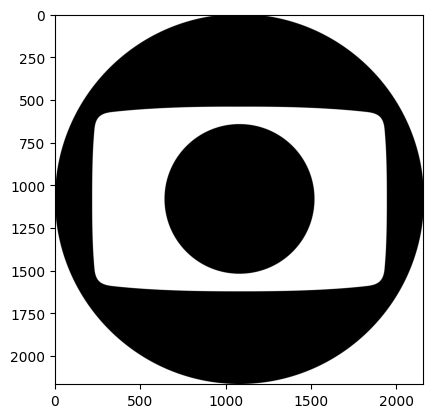

In [158]:
plt.imshow(globo_mask)

In [159]:
def plot_cloud(corpus, title=''):
  wordcloud = WordCloud(width=400, height=200, 
                            max_font_size=230,
                            max_words=200,
                            background_color="white", 
                            mask=globo_mask,
                            contour_width=3,
                            contour_color='steelblue', 
                            collocations=False).generate(' '.join(list(itertools.chain.from_iterable(corpus))))
  return wordcloud
      
  # plt.figure(figsize=(7,10))
  # plt.imshow(wordcloud)
  # plt.axis("off")
  # #plt.savefig(f'{path}/figuras/{title}.png', transparent=True, dpi=300)
  # plt.show()

In [160]:
wc = plot_cloud(titulos_token, 'clean')

In [161]:
wc.to_file("globo-masked2.png")

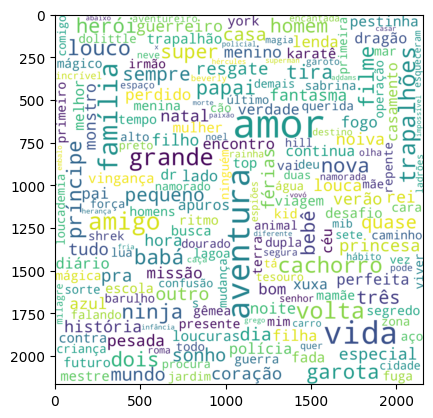

In [162]:
plt.imshow(wc, interpolation="bilinear")